In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
%ls

app.py                   data_processing.ipynb    nfl_random_forest.ipynb
app2.py                  drive_data/              nfl_xg_boost.ipynb
data/                    models/                  requirements.txt


# NBA 2022 - 2023 Data

In [4]:
#2022 - 2023 Season
NBA = pd.read_excel('drive_data/NBA/NBA Team Stats - 2022 - 2023.xlsx')

In [5]:
NBA.columns

Index(['Team', 'W', 'L', 'Pct', 'Reg_Rank', 'Playoff_Rank', 'Off_Rtg',
       'Def_Rtg', 'Net_Rtg', 'Total_Salary', 'Top_3_Salary'],
      dtype='object')

In [6]:
NBA['Playoff_Rank'] = NBA['Playoff_Rank'].replace('-', 32)

In [7]:
#adding overall performance rank --> lower the better
#overall_rank = reg_rank + playoff_rank^2
scaling_factor = 1.6
NBA["Overall_Rank"] = NBA["Reg_Rank"] + NBA["Playoff_Rank"]**scaling_factor

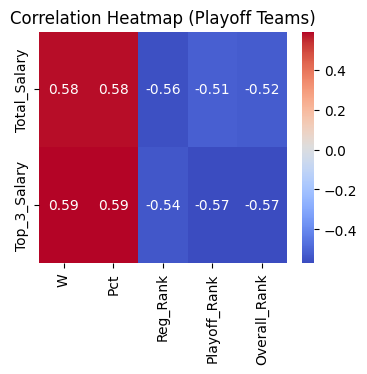

In [8]:
correlations_NBA = NBA[['Total_Salary', 'Top_3_Salary', 'W', 'Pct', 'Reg_Rank', 'Playoff_Rank', 'Overall_Rank']].corr()
correlations_NBA = correlations_NBA.loc[['Total_Salary', 'Top_3_Salary'], ['W', 'Pct', 'Reg_Rank', 'Playoff_Rank', 'Overall_Rank']]

# Plot the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlations_NBA, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Playoff Teams)")
plt.show()

In [9]:
# Function to calculate and display R^2
def plot_with_r2_from_corr(x, y, data, xlabel, ylabel, title, invert_y=False):
    """
    Creates a scatter plot with a regression line using Seaborn and displays the R^2 value on the plot.
    
    Parameters:
    x (str): The column name for the x-axis (independent variable).
    y (str): The column name for the y-axis (dependent variable).
    data (pd.DataFrame): The DataFrame containing the data.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    title (str): Title of the plot.
    invert_y (bool): If True, inverts the y-axis. Default is False.
    """
    # Calculate the correlation coefficient (r) and R^2
    corr_matrix = data[[x, y]].corr()
    r = corr_matrix.loc[x, y]
    r_squared = r ** 2  # Calculate R^2

    # Create the scatter plot with regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x=x,
        y=y,
        data=data,
        scatter_kws={'s': 70, 'alpha': 0.7, 'color': 'dodgerblue'},
        line_kws={"color": "red", "linewidth": 2}
    )

    # Add R^2 value to the plot
    plt.text(
        0.05, 0.95, 
        f"$R^2 = {r_squared:.2f}$", 
        fontsize=12, 
        transform=plt.gca().transAxes, 
        verticalalignment='top',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)
    )

    # Add title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Invert the y-axis if the parameter is set to True
    if invert_y:
        plt.gca().invert_yaxis()

    # Add grid for better visibility
    plt.grid(visible=True, linestyle='--', alpha=0.6)

    # Show the plot
    plt.tight_layout()
    plt.show()

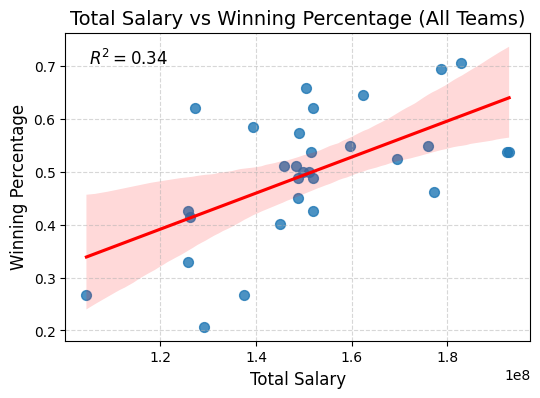

In [10]:
# 1. Total Salary vs Winning Percentage
plot_with_r2_from_corr(
    x="Total_Salary", y="Pct", data=NBA,
    xlabel="Total Salary", ylabel="Winning Percentage",
    title="Total Salary vs Winning Percentage (All Teams)"
)

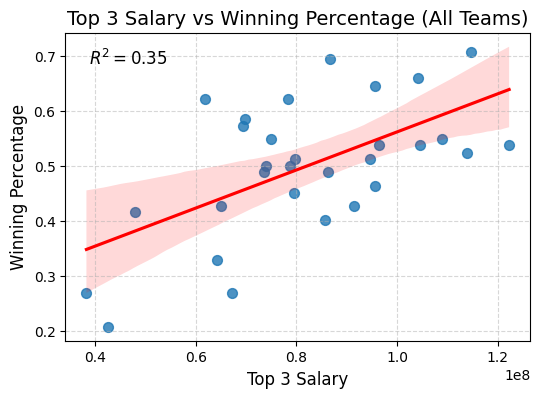

In [11]:
# 2. Top 3 Salary vs Winning Percentage
plot_with_r2_from_corr(
    x="Top_3_Salary", y="Pct", data=NBA,
    xlabel="Top 3 Salary", ylabel="Winning Percentage",
    title="Top 3 Salary vs Winning Percentage (All Teams)"
)

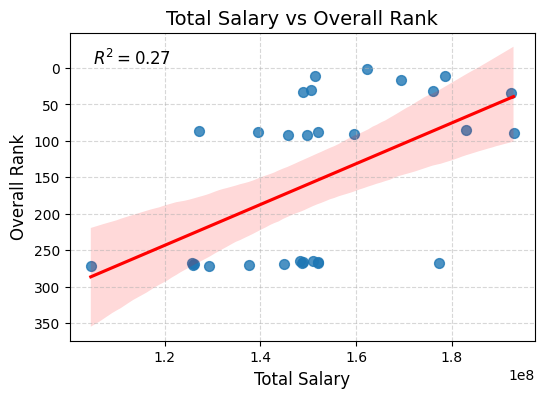

In [12]:
# 3. Total Salary vs Overall Rank (Playoff Teams)
plot_with_r2_from_corr(
    x="Total_Salary", y="Overall_Rank", data=NBA,
    xlabel="Total Salary", ylabel="Overall Rank",
    title="Total Salary vs Overall Rank", invert_y=True
)

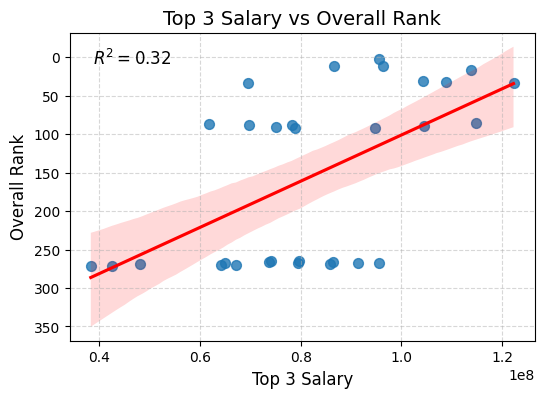

In [13]:

# 4. Top 3 Salary vs Overall Rank (Playoff Teams)
plot_with_r2_from_corr(
    x="Top_3_Salary", y="Overall_Rank", data=NBA,
    xlabel="Top 3 Salary", ylabel="Overall Rank",
    title="Top 3 Salary vs Overall Rank", invert_y=True
)

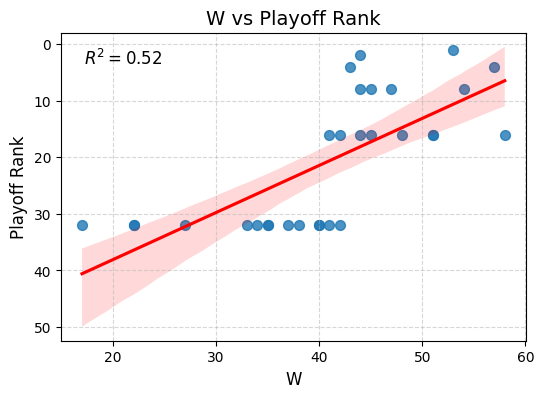

In [14]:
plot_with_r2_from_corr(
    x="W", y="Playoff_Rank", data=NBA,
    xlabel="W", ylabel="Playoff Rank",
    title="W vs Playoff Rank", invert_y=True
)

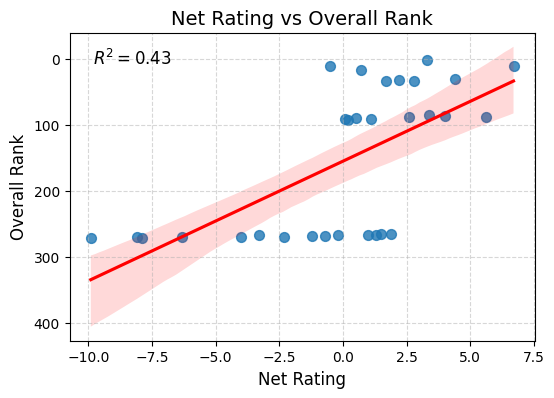

In [15]:
plot_with_r2_from_corr(
    x="Net_Rtg", y="Overall_Rank", data=NBA,
    xlabel="Net Rating", ylabel="Overall Rank",
    title="Net Rating vs Overall Rank", invert_y=True
)

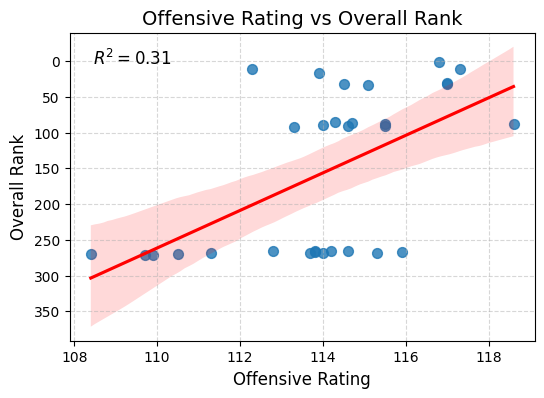

In [16]:
plot_with_r2_from_corr(
    x="Off_Rtg", y="Overall_Rank", data=NBA,
    xlabel="Offensive Rating", ylabel="Overall Rank",
    title="Offensive Rating vs Overall Rank", invert_y=True
)

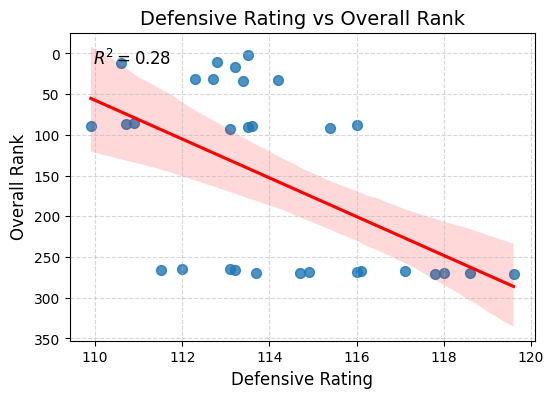

In [17]:
plot_with_r2_from_corr(
    x="Def_Rtg", y="Overall_Rank", data=NBA,
    xlabel="Defensive Rating", ylabel="Overall Rank",
    title="Defensive Rating vs Overall Rank", invert_y=True
)

# MLS 2022 - 2023 Data

In [18]:
MLS = pd.read_excel('drive_data/MLS/MLS Stats - 2023-2024_.xlsx')

In [19]:
MLS

,Club,MP,W,D,L,GF,GA,GD,Pts,Reg_Rank,Playoff_Rank,Salary Cost (Millions)
0,LAFC,34,19,7,8,63,43,20,64,1,8,15.90
1,LA Galaxy,34,19,7,8,69,50,19,64,2,1,17.93
2,Real Salt Lake,34,16,11,7,65,48,17,59,3,16,13.60
3,Seattle Sounders,34,16,9,9,51,35,16,57,4,4,16.58
4,Houston Dynamo,34,15,9,10,47,39,8,54,5,16,16.77
5,Minnesota,34,15,7,12,58,49,9,52,6,8,14.91
6,Colorado,34,15,5,14,61,60,1,50,7,16,16.33
7,Vancouver,34,13,8,13,52,49,3,47,8,16,15.20
8,Portland,34,12,11,11,65,56,9,47,9,-,15.37
9,Austin,34,11,9,14,39,48,-9,42,10,-,18.41


In [20]:
MLS.columns

Index(['Club', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Reg_Rank',
       'Playoff_Rank', 'Salary Cost (Millions)'],
      dtype='object')

In [21]:
MLS['Playoff_Rank'] = MLS['Playoff_Rank'].replace('-', 32)

In [22]:
scaling_factor = 1.3
MLS['Overall_Rank'] = MLS['Reg_Rank'] + MLS['Playoff_Rank'] ** scaling_factor

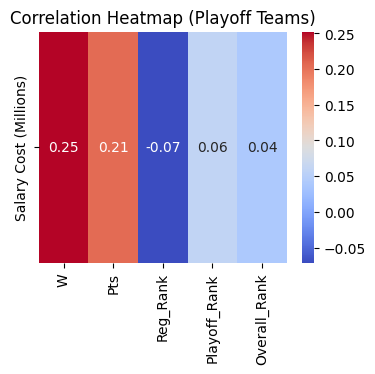

In [23]:
correlations_MLS = MLS[['Salary Cost (Millions)', 'W', 'Pts', 'Reg_Rank', 'Playoff_Rank', 'Overall_Rank']].corr()
correlations_MLS = correlations_MLS.loc[['Salary Cost (Millions)'], ['W', 'Pts', 'Reg_Rank', 'Playoff_Rank', 'Overall_Rank']]

# Plot the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlations_MLS, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Playoff Teams)")
plt.show()

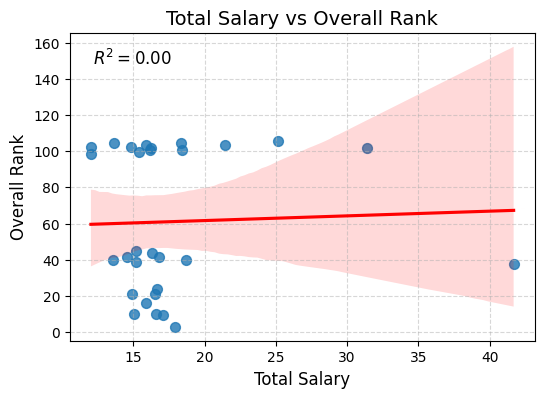

In [24]:
plot_with_r2_from_corr(
    x="Salary Cost (Millions)", y="Overall_Rank", data=MLS,
    xlabel="Total Salary", ylabel="Overall Rank",
    title="Total Salary vs Overall Rank"
)

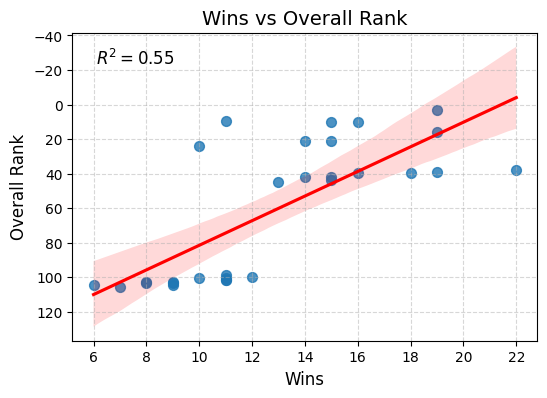

In [25]:
plot_with_r2_from_corr(
    x="W", y="Overall_Rank", data=MLS,
    xlabel="Wins", ylabel="Overall Rank",
    title="Wins vs Overall Rank", invert_y = True
)

In [26]:
MLS_inter_removed = MLS[MLS['Club'] != "Inter Miami"]

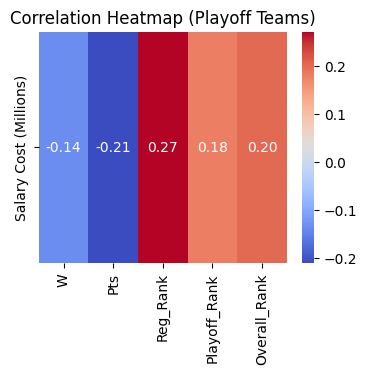

In [27]:
correlations_MLS_inter = MLS_inter_removed[['Salary Cost (Millions)', 'W', 'Pts', 'Reg_Rank', 'Playoff_Rank', 'Overall_Rank']].corr()
correlations_MLS_inter = correlations_MLS_inter.loc[['Salary Cost (Millions)'], ['W', 'Pts', 'Reg_Rank', 'Playoff_Rank', 'Overall_Rank']]

# Plot the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlations_MLS_inter, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Playoff Teams)")
plt.show()

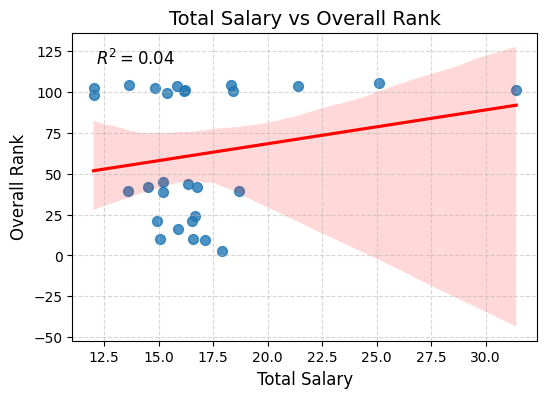

In [28]:
plot_with_r2_from_corr(
    x="Salary Cost (Millions)", y="Overall_Rank", data=MLS_inter_removed,
    xlabel="Total Salary", ylabel="Overall Rank",
    title="Total Salary vs Overall Rank"
)

# NBA 2022 - 2023 Data

In [29]:
NFL = pd.read_csv('drive_data/NFL/NFL Team Stats 2022 - Sheet1.csv')

In [30]:
NFL.head()

,Team_Season,Team,QB,RB,WR,TE,OL,Offense,IDL,EDGE,...,EDGE_P,LB_P,S_P,CB_P,Defense_P,Offense_P,Dead_Open_Specials,W,Reg_Rank,Playoff_Rank
0,Cardinals 2022,Cardinals,16348925,6213758,24621833,7121287,44681251,98987054,23503243,9842220,...,0.047273,0.073820,0.094174,0.034218,0.362372,0.475442,0.162186,4,29,32
1,Falcons 2022,Falcons,6303695,4894510,9535858,10678128,32848444,64260635,18104464,6077102,...,0.029189,0.023618,0.021461,0.067402,0.228627,0.308649,0.462725,7,22,32
2,Ravens 2022,Ravens,24100655,8179654,7616822,12307075,38678276,90882482,11195023,14877531,...,0.071458,0.037714,0.057958,0.154194,0.375094,0.436515,0.188390,10,9,16
3,Bills 2022,Bills,20230481,7299886,18982654,4501683,29350967,80365671,16458562,12078022,...,0.058012,0.115715,0.087184,0.126374,0.466336,0.386002,0.147662,13,3,8
4,Panthers 2022,Panthers,20461726,3829960,12882679,5253310,33291588,75719263,11405978,9462303,...,0.045448,0.111972,0.032674,0.080464,0.325342,0.363685,0.310973,7,23,32


In [31]:
NFL.columns

Index(['Team_Season', 'Team', 'QB', 'RB', 'WR', 'TE', 'OL', 'Offense', 'IDL',
       'EDGE', 'LB', 'S', 'CB', 'Defense', 'Season', 'W_PCT', 'Playoffs', 'SB',
       'Cap', 'QB_P', 'RB_P', 'WR_P', 'TE_P', 'OL_P', 'IDL_P', 'EDGE_P',
       'LB_P', 'S_P', 'CB_P', 'Defense_P', 'Offense_P', 'Dead_Open_Specials',
       'W', 'Reg_Rank', 'Playoff_Rank'],
      dtype='object')

In [32]:
NFL["Total Team Salary"] = NFL["Offense"] + NFL["Defense"]

In [33]:
scaling_factor = 1.3
NFL['Overall_Rank'] = NFL['Reg_Rank'] + NFL['Playoff_Rank'] ** scaling_factor

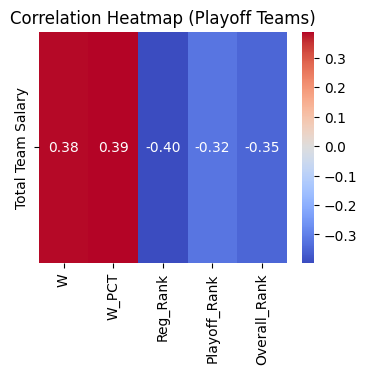

In [34]:
correlations_NFL = NFL[['Total Team Salary', 'Offense', 'Defense', 'Reg_Rank', 'Playoff_Rank', 'Overall_Rank', 'W', 'W_PCT']].corr()
correlations_NFL = correlations_NFL.loc[['Total Team Salary'], ['W', 'W_PCT', 'Reg_Rank', 'Playoff_Rank', 'Overall_Rank']]

# Plot the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlations_NFL, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Playoff Teams)")
plt.show()

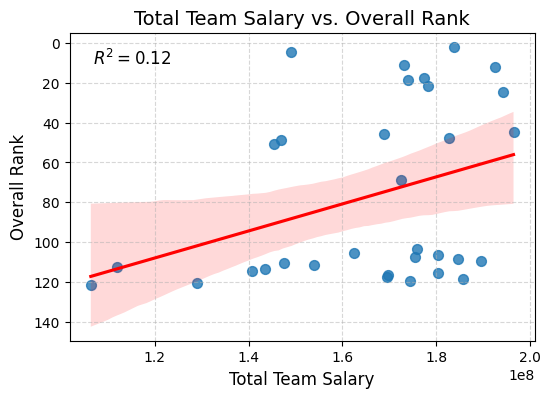

In [35]:
plot_with_r2_from_corr(
    x="Total Team Salary", y="Overall_Rank", data=NFL,
    xlabel="Total Team Salary", ylabel="Overall Rank",
    title="Total Team Salary vs. Overall Rank", invert_y = True
)

# 5 Big Leagues Performance in Champions League

In [36]:
CL_perf = pd.read_csv('drive_data/Champoins League League Stats - 2016-2023 - Performance.csv')
CL_wage = pd.read_csv('drive_data/Champions League League Stats - 2016-2023 - Wage.csv')

In [37]:
CL_perf["Year"] = pd.to_datetime(CL_perf["Year"], format="%Y/%y")
CL_wage["Year"] = pd.to_datetime(CL_wage["Year"], format="%Y/%y")

In [38]:
for column in CL_wage.columns[1:]:
    CL_wage[column] = pd.to_numeric(CL_wage[column].str.replace(",", ""), errors='coerce')

In [39]:
CL_wage

,Year,Premier League,Bundesliga,La Liga,Serie A,Ligue 1
0,2017-01-01,2894,1478,1691,1401,1078
1,2018-01-01,3217,1674,2033,1472,1262
2,2019-01-01,3579,1798,2094,1757,1389
3,2020-01-01,3742,1807,2102,1611,1416
4,2021-01-01,3902,1952,2187,2097,1586
5,2022-01-01,4306,1862,2381,1950,1760
6,2023-01-01,4627,2124,2490,1889,1842


In [40]:
CL_perf

,Year,Premier League,Bundesliga,La Liga,Serie A,Ligue 1
0,2017-01-01,18.00,16.00,7.25,27.33,17.33
1,2018-01-01,10.50,22.67,12.25,14.67,37.33
2,2019-01-01,4.75,20.00,17.00,22.00,21.33
3,2020-01-01,14.00,13.25,12.00,18.00,12.67
4,2021-01-01,10.75,12.00,13.00,20.00,22.67
5,2022-01-01,7.50,26.00,11.25,24.00,16.00
6,2023-01-01,10.25,14.00,25.00,11.50,24.00


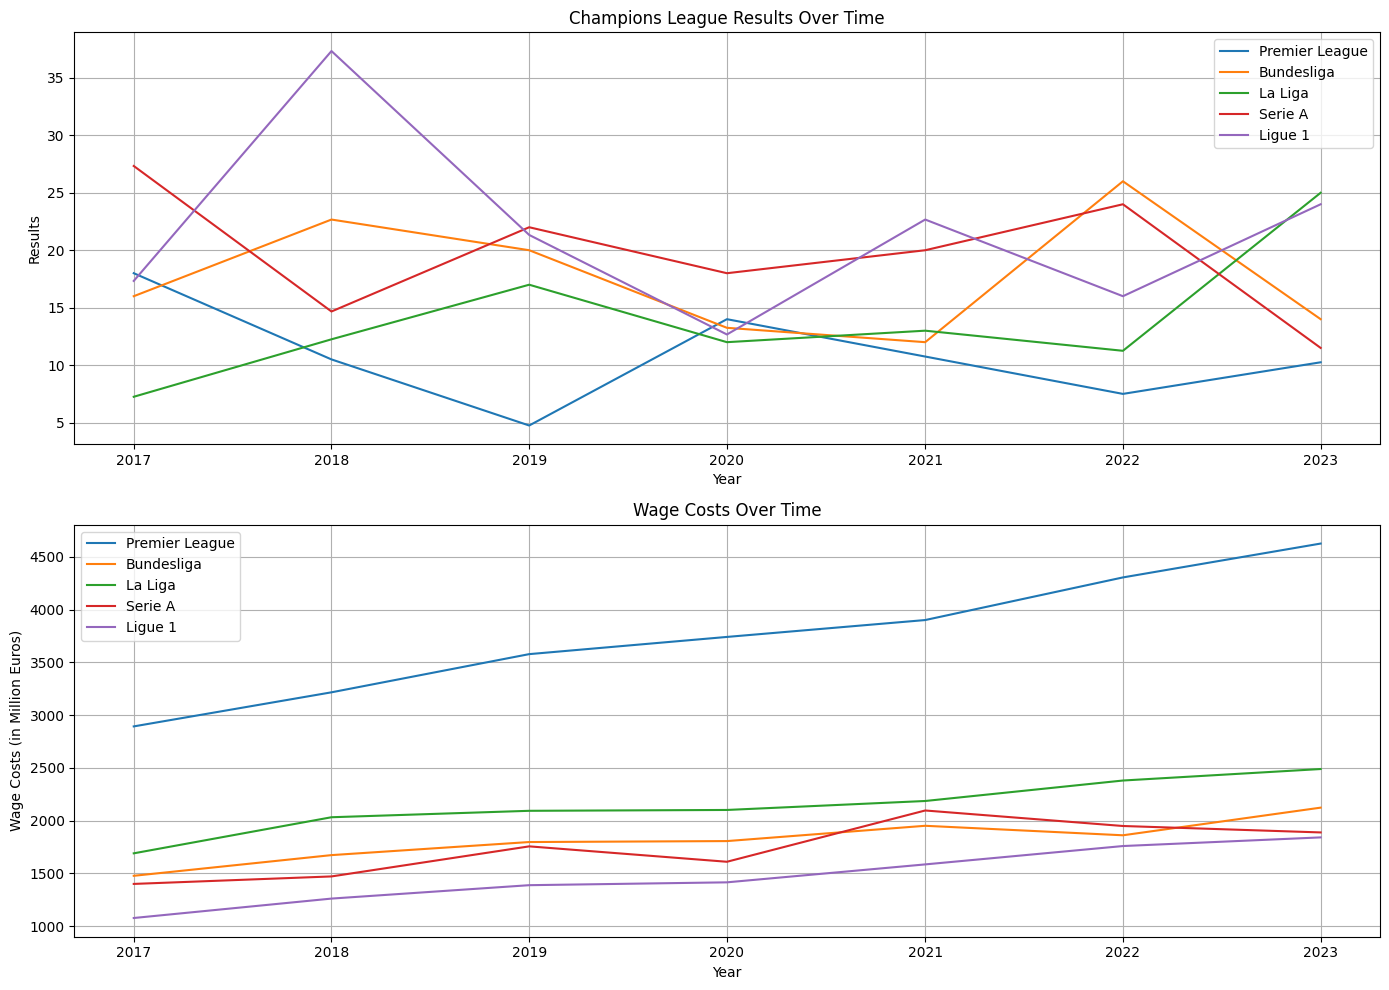

In [41]:
# Plotting time series
plt.figure(figsize=(14, 10))

# Champions League results
plt.subplot(2, 1, 1)
for league in ["Premier League", "Bundesliga", "La Liga", "Serie A", "Ligue 1"]:
    plt.plot(CL_perf["Year"], CL_perf[league], label=league)
plt.title("Champions League Results Over Time")
plt.xlabel("Year")
plt.ylabel("Results")
plt.legend()
plt.grid()

# Wage costs
plt.subplot(2, 1, 2)
for league in ["Premier League", "Bundesliga", "La Liga", "Serie A", "Ligue 1"]:
    plt.plot(CL_wage["Year"], CL_wage[league], label=league)
plt.title("Wage Costs Over Time")
plt.xlabel("Year")
plt.ylabel("Wage Costs (in Million Euros)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
# Calculating correlation and R^2 for each league
print("Correlation and R^2 values between Champions League results and wage costs:\n")
all_leagues_changes = []
for league in ["Premier League", "Bundesliga", "La Liga", "Serie A", "Ligue 1"]:
    x = CL_wage[league].values.reshape(-1, 1)
    y = CL_perf[league].values

    # Linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Calculate correlation and R^2
    correlation = pd.Series(x.flatten()).corr(pd.Series(y))
    r2 = r2_score(y, y_pred)
    all_leagues_changes.append((league, correlation, r2))

    print(f"{league}: Correlation = {correlation:.4f}, R^2 = {r2:.4f}")

# Aggregated correlation and R^2 statistics
avg_correlation = sum([x[1] for x in all_leagues_changes]) / len(all_leagues_changes)
avg_r2 = sum([x[2] for x in all_leagues_changes]) / len(all_leagues_changes)

print("\nAggregated Statistics:")
print(f"Average Correlation: {avg_correlation:.4f}")
print(f"Average R^2: {avg_r2:.4f}")


Correlation and R^2 values between Champions League results and wage costs:

Premier League: Correlation = -0.4763, R^2 = 0.2269
Bundesliga: Correlation = -0.2570, R^2 = 0.0661
La Liga: Correlation = 0.7205, R^2 = 0.5192
Serie A: Correlation = -0.1419, R^2 = 0.0201
Ligue 1: Correlation = -0.1307, R^2 = 0.0171

Aggregated Statistics:
Average Correlation: -0.0571
Average R^2: 0.1699
